In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("reviews.csv") 

In [3]:
df.shape

(1000, 2)

In [4]:
df.sample(5)

,Description,Is_Response
86,"i stayed at this hotel in mid-August for work,...",happy
271,"Wow i had so much fun, there was some great st...",happy
12,We stay at the Jolly Madison over the Xmas per...,not happy
438,This is my second stay in the dream downtown. ...,not happy
18,We stayed here for - nights and were really ha...,happy


In [5]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [6]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [8]:
df.sample(5)

,Description,Is_Response
28,I have stayed here numerous times and never be...,1
660,We are traveling to Cocoa Beach and stopped he...,1
610,I really enjoyed my stay here. Aesthetically i...,1
480,"Staff was friendly - new to the city, I was gi...",1
753,Don't make the mistake and stay here unless yo...,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [10]:
X = df['Description']
y = df['Is_Response']

In [58]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [59]:
features.shape

(1000, 8212)

In [48]:
type(features)

scipy.sparse.csr.csr_matrix

In [49]:
features.toarray()[500:510,3000:3020]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [52]:
clf = LogisticRegression().fit(X_train,y_train)

In [53]:
### Train accuracy
clf.score(X_train,y_train)

0.70625

In [54]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.65


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  0  70]
 [  0 130]]


In [56]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.65      1.00      0.79       130

    accuracy                           0.65       200
   macro avg       0.33      0.50      0.39       200
weighted avg       0.42      0.65      0.51       200



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

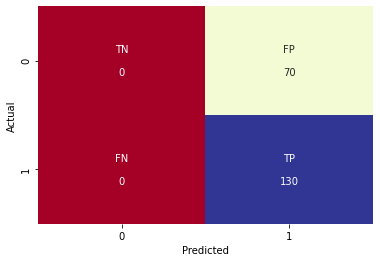

In [57]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [33]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service. Bad worst ugly. No No No",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8493)
[1 0 1]


## Text classification using BernoulliNB

In [73]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1))
features = tfidf.fit_transform(X).toarray()

In [74]:
features.shape

(1000, 8493)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [76]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [77]:
bnb.score(X_train,y_train)

0.83875

In [78]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 31  39]
 [ 12 118]]


Text(0.5, 15.0, 'Predicted')

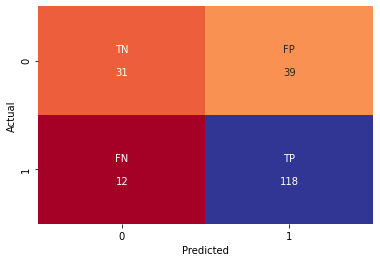

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")